In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
a1 = np.linspace(-0.5,0.5,200)
a1.shape = (200,1)
a1

array([[-0.5       ],
       [-0.49497487],
       [-0.48994975],
       [-0.48492462],
       [-0.4798995 ],
       [-0.47487437],
       [-0.46984925],
       [-0.46482412],
       [-0.45979899],
       [-0.45477387],
       [-0.44974874],
       [-0.44472362],
       [-0.43969849],
       [-0.43467337],
       [-0.42964824],
       [-0.42462312],
       [-0.41959799],
       [-0.41457286],
       [-0.40954774],
       [-0.40452261],
       [-0.39949749],
       [-0.39447236],
       [-0.38944724],
       [-0.38442211],
       [-0.37939698],
       [-0.37437186],
       [-0.36934673],
       [-0.36432161],
       [-0.35929648],
       [-0.35427136],
       [-0.34924623],
       [-0.34422111],
       [-0.33919598],
       [-0.33417085],
       [-0.32914573],
       [-0.3241206 ],
       [-0.31909548],
       [-0.31407035],
       [-0.30904523],
       [-0.3040201 ],
       [-0.29899497],
       [-0.29396985],
       [-0.28894472],
       [-0.2839196 ],
       [-0.27889447],
       [-0

In [15]:
# 定义样本数据
# 使用numpy在（-0.5 到 0.5）之间生成均匀分布的200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]  # 200行 1列 与上面代码等效

noise = np.random.normal(0,0.02,x_data.shape) # 生成干扰项
y_data = np.square(x_data) + noise

# x_data = np.array([[0.2204],[0.1216],[0.1534],[0.0852],[0.1940]])
# y_data = np.array([[0.390],[0.262],[0.335],[0.178],[0.360]])  


# 根据样本样式定义创建占位符（1列）
x = tf.placeholder(tf.float32, [None,1]) # [样本数，特征列数]
y = tf.placeholder(tf.float32, [None,1])


# 定义神经网络的中间层
# 中间层输出：L1 （10个神经元）
W1 = tf.Variable(tf.random_normal([1,10])) # 1行10列（输入层1个变量，中间层10个神经元）
B1 = tf.Variable(tf.random_normal([1,10]))
xW1B1 = tf.matmul(x, W1) + B1
Z1 = tf.nn.tanh(xW1B1) # 激活函数：tanh (双曲正切函数)


# 定义神经网络的输出层
# 10行1列（中间层10个神经元，输出层1个）
W2 = tf.Variable(tf.random_normal([10,1]))
B2 = tf.Variable(tf.random_normal([1,1]))


# 中间层的输出作为输出层的输入
xW2B2 = tf.matmul(Z1, W2) + B2
Z2 = tf.nn.tanh(xW2B2)
prediction = Z2


# 二次代阶函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 定义一个梯度下降法来进行训练的优化器
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


# 常用写法（无需手动关闭会话）
with tf.Session() as sess: 
    # 初始化全部变量
    sess.run(tf.global_variables_initializer())
    # 训练2000次
    for step in range(2000):
        sess.run(train,feed_dict={x:x_data,y:y_data})

    # 获取预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})

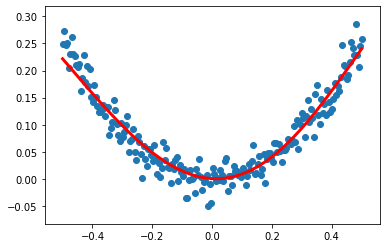

In [16]:
# 画图
plt.figure()
# plt.ion()  #interactive mode on
# 绘制样本点
plt.scatter(x_data, y_data)
# 预测结果用红色实线绘制
plt.plot(x_data, prediction_value,'r-',lw=3)
plt.pause(0.001)
plt.show()